In [1]:
# First we need to import all the necessary toolboxes...
from scipy.optimize import fsolve 
# import all the standard math functions and plotting stuff we'd want from numpy and matplotlib
from numpy import*
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 
import pandas as pd

# Chapter 4 2D furnace stack example
Consider a large industrial furnace supported by a long column of refractor brick (1 m x 1 m on a side, k = 1 W/mK). At steady state, three of the sides are maintained at 500K, while the fourth surface is exposed to the ambient air stream at 300 K (h = 10 W/m2K). Determine the 2-D temperature profile within the brick.

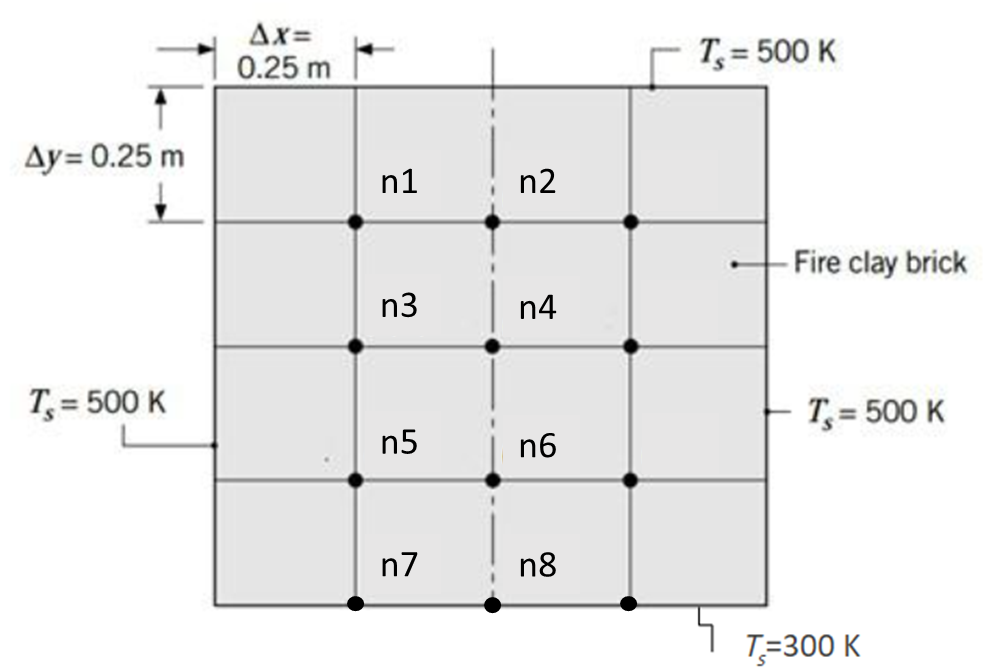

### Assumptions:
- steady state
- 2-D conduction
- constant properties (i.e., $k$'s)
- symmetrical about the central axis


### Analysis:
From these assumptions we can build our nodal network:

Nodes 1, 3, 5 are Case 1 nodes (i.e., interior):

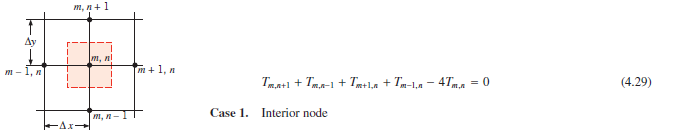

$$
T_{m,n+1} + T_{m,n-1} + T_{m-1,n} - 4T_{m,n} = 0
$$

Nodes 2, 4, 6 (note the symmetry about these nodes) are Case 5 nodes (i.e. next to uniform ht flx = 0 due to symmetry):

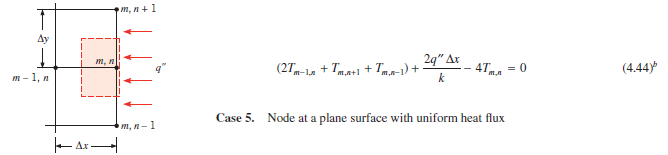

$$
2T_{m-1,n} + T_{m,n+1} + T_{m,n-1} + 0 - 4T_{m,n} = 0
$$

Node 7 is a Case 3 node (with convection on one side):

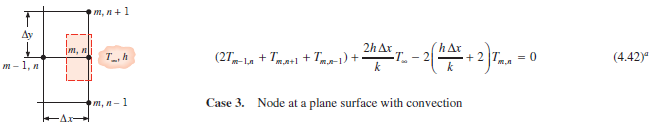

$$
2T_5 + 500 + T_8 + \frac{2h\Delta x}{k}300 - 2\left(\frac{h \Delta x}{k}+2\right)T_7 = 0
$$

Node 8 has conduction from 2 sides, symmetry on one side, and convection on the fourth side: 

$$
k\frac{\Delta y}{2}\Delta z \frac{T_7-T_8}{\Delta x} + k\frac{\Delta x}{2}\Delta z \frac{T_6-T_8}{\Delta y} + 0 + h\frac{\Delta x}{2}\Delta z \left(T_\infty-T_8\right) = 0
$$

...which reduces to: 

$$
2T_7 + 2T_6 + 1500 - 9T_8 = 0
$$

The next step is to build up our matrix, one row for each node where all the constants are grouped and moved to the other side of the "=" from the Temp variables. So, for example the node 1 equation becomes:

$$
-4T_1 + T_2 + T_3 \quad \left(+ 0T_4 + 0T_5 + 0T_6 + 0T_7 + 0T_8\right) = -1000
$$

In [2]:
# Set up the matrices to solve, this is the matrix of our nodes
# note that we're only defining the nodes of unknown temp, so when we go to
# make a figure, we'll need to add back in nodes representing the boundary
# conditions...

# Let's set up the nodes individually:
n1 = [-4, 1, 1, 0, 0, 0, 0, 0]
n2 = [ 2,-4, 0, 1, 0, 0, 0, 0]
n3 = [ 1, 0,-4, 1, 1, 0, 0, 0]
n4 = [ 0, 1, 2,-4, 0, 1, 0, 0]
n5 = [ 0, 0, 1, 0,-4, 1, 1, 0]
n6 = [ 0, 0, 0, 1, 2,-4, 0, 1]
n7 = [ 0, 0, 0, 0, 2, 0,-9, 1]
n8 = [ 0, 0, 0, 0, 0, 2, 2,-9]

# Assemble our [A] matrix:
A = array([n1,n2,n3,n4,n5,n6,n7,n8])

# Set up the [C] matrix
C = array([-1000,-500,-500,0,-500,0,-2000,-1500])

# Now we can solve for our temps
T = linalg.solve(A,C)

# Now, we can use the "pandas" toolbox to display temp in a nice way
Temp = {'Temp': T}
df = pd.DataFrame(Temp)
pd.options.display.float_format = '{:,.3f}'.format #limit pandas output sig figs
display(df)

,Temp
0,489.305
1,485.154
2,472.065
3,462.006
4,436.950
5,418.739
6,356.995
7,339.052


## Contour Plot

The rest of this is just code to make a pretty plot. Rearranging our temperature solution into a form that makes sense, visually, is also one of the more difficult parts of an analysis like this.

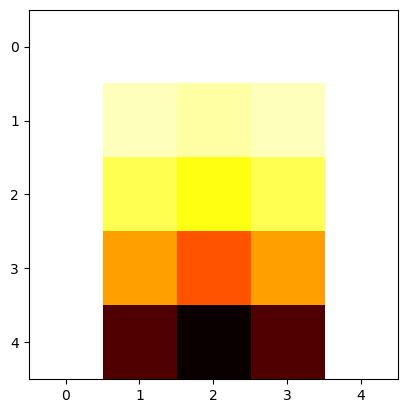

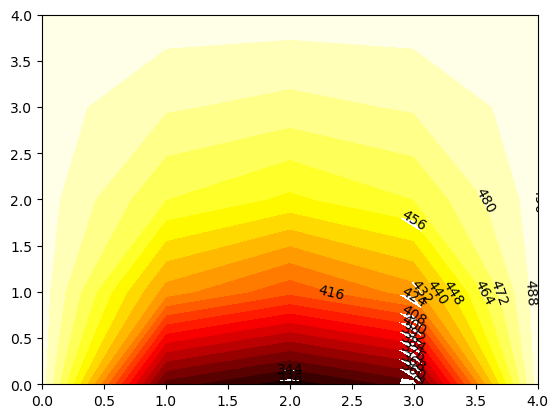

In [3]:
#  Now we need to make a mesh where each node is like in our 2D picture
#  Then we need to assign the temps from our solution to the proper
#  nodes ... note here we're also including the mirror nodes
nodes = ([T[0],T[1],T[0]],
         [T[2],T[3],T[2]],
         [T[4],T[5],T[4]],
         [T[6],T[7],T[6]])

TT = full((5, 5), 500)  # Creates a 5x5 matrix where all values are 500, our fixed boundary condition
TT[1:,1:-1] = nodes # replaces inner nodes with Temp soln
plt.imshow(TT,cmap ='hot') # makes a "colorbar" plot showing the actual grid resolution

# ...or we can fake a contour plot with an arbitrary number of levels
fig, ax = plt.subplots()  # Creates a new figure
# ax.grid(True)  # Enables a grid on the plot
F = ax.contourf(flipud(TT), levels=20,cmap ='hot')
plt.clabel(F,colors = 'black')  # Puts labels in plot
plt.show()